In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/qhgus/PycharmProjects/pythonProject/price.csv', index_col=0)
df.index = pd.to_datetime(df.index)

df.columns = ['us10ybond', 'kospi200tr']
indexes = df['kospi200tr'].dropna().index.tolist()

all_dates = pd.date_range(df.index[0], df.index[-1])
df = df.reindex(all_dates)
df = df.ffill()
df = df.reindex(indexes)

In [5]:
signal_sr = pd.read_csv('C:/Users/qhgus/PycharmProjects/pythonProject/signal.csv', index_col=0)
signal_sr.index = pd.to_datetime(signal_sr.index)
signal_sr = signal_sr.T.iloc[0]
signal_sr = signal_sr.fillna('').astype(str).str[:-1]
signal_sr[signal_sr == ''] = np.nan
signal_sr = signal_sr.astype(float)

In [6]:
weight_df = pd.DataFrame(columns=['us10ybond', 'kospi200tr'])
portfolio_sr = pd.Series(index=['us10ybond', 'kospi200tr'], data=[0,1], name=df.index[0])
weight_df = weight_df.append(portfolio_sr)

In [7]:
for date, value in signal_sr.items():
    if value > 0.04:
        temp_sr = pd.Series(index=['us10ybond', 'kospi200tr'], data=[1,0], name=date)
    elif value < -0.04:
        temp_sr = pd.Series(index=['us10ybond', 'kospi200tr'], data=[0,1], name=date)
    else:
        continue

    if portfolio_sr.values[0] == temp_sr.values[0] and portfolio_sr.values[1] == temp_sr.values[1]:
        continue

    portfolio_sr = temp_sr.copy()
    weight_df = weight_df.append(temp_sr)

return_df = df.pct_change().fillna(0)
portfolio_return_sr = pd.Series(index=return_df.index, dtype=float)

switching_dates = weight_df.index.tolist()[:]
weight_df = weight_df.reindex(df.index)
weight_df = weight_df.ffill()

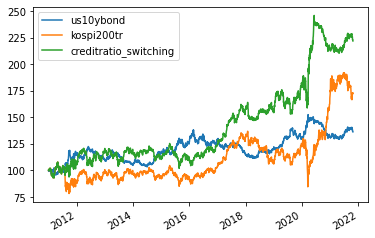

In [8]:
for x in df.index:
    us10ybond = weight_df.loc[x, 'us10ybond'] * return_df.loc[x, 'us10ybond']
    kospi200tr = weight_df.loc[x, 'kospi200tr'] * return_df.loc[x, 'kospi200tr']

    portfolio_return_sr[x] = us10ybond + kospi200tr

result_return_df = return_df.copy()
df = pd.concat([result_return_df, portfolio_return_sr.rename('creditratio_switching')], axis=1)
df += 1
df.iloc[0] = 100
df = df.cumprod()

ax = df.plot()
plt.show()